In [13]:
import numpy as np
import pandas as pd
from copy import deepcopy
import sys
from statsbombpy import sb
import mplsoccer
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
from copy import deepcopy
import sys

import mplsoccer
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.projections import get_projection_class
import matplotlib.patheffects as path_effects

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)

In [14]:
free_comps = sb.competitions()

#print a list of free competitions
free_comps

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413


In [15]:
comps = sb.competitions()
comps['competition_name'].unique() 

bayer_leverkusn_matches = sb.matches(competition_id=9, season_id=281)

#print the first 5 matches listed
bayer_leverkusn_matches.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,available,2024-05-10T16:57:53.017895,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,available,2024-05-12T21:04:50.061716,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,available,2024-05-14T16:23:06.325967,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,available,2024-05-14T10:09:25.875345,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,available,2024-05-20T10:11:27.857660,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2


In [16]:

#get the matches for a specific team
team="Bayer Leverkusen"


matches_df = bayer_leverkusn_matches [(bayer_leverkusn_matches ['home_team'] == team) | (bayer_leverkusn_matches ['away_team'] == team)]

matches_df=matches_df.sort_values(by='match_date', ascending=False)

In [17]:
matches_df.head(5)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,available,2024-05-20T10:11:27.857660,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,available,2024-05-14T10:09:25.875345,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,available,2024-05-14T16:23:06.325967,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
17,3895320,2024-04-27,19:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,VfB Stuttgart,2,2,available,available,2024-05-13T17:30:42.626289,2024-05-13T17:38:39.789677,31,Regular Season,BayArena,Felix Zwayer,Xabier Alonso Olano,Sebastian Hoeneß,1.1.0,2,2
18,3895309,2024-04-21,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Borussia Dortmund,Bayer Leverkusen,1,1,available,available,2024-05-10T14:35:19.321055,2024-05-10T14:39:35.216574,30,Regular Season,Signal-Iduna-Park,Daniel Siebert,Edin Terzić,Xabier Alonso Olano,1.1.0,2,2


In [18]:

latest_match_id = matches_df.match_id.iloc[0]



In [19]:
events_df = sb.events(match_id=latest_match_id) 


events_df.head(5)

,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,dribble_outcome,dribble_overrun,duel_outcome,duel_type,duration,foul_committed_advantage,foul_committed_card,foul_committed_offensive,foul_committed_type,foul_won_advantage,foul_won_defensive,goalkeeper_body_part,goalkeeper_end_location,...,position,possession,possession_team,possession_team_id,related_events,second,shot_body_part,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,Bayer Leverkusen,904,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",Bayer Leverkusen,904,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,Bayer Leverkusen,904,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'formation': 41212, 'lineup': [{'player': {'i...",Augsburg,172,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,Bayer Leverkusen,904,[3e541dff-53f9-417b-b7c4-9f2c57a0cebc],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,Bayer Leverkusen,904,[4f9c7c83-f5b4-4017-90e9-315c479028a1],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augsburg,172,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,69,Bayer Leverkusen,904,[0822682c-1e42-480c-a818-d5b911cb6926],0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Augsburg,172,00:00:00.000,Half Start,NaN


In [20]:
events_df.columns

Index(['ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'out', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_

In [21]:
events_df=events_df[['team', 'player','type', 'location', 'pass_end_location']]
events_df.head()

,team,player,type,location,pass_end_location
0,Bayer Leverkusen,NaN,Starting XI,NaN,NaN
1,Augsburg,NaN,Starting XI,NaN,NaN
2,Bayer Leverkusen,NaN,Half Start,NaN,NaN
3,Augsburg,NaN,Half Start,NaN,NaN
4,Augsburg,NaN,Half Start,NaN,NaN


In [22]:
#Filtering out the locations for only Pressures
events_df= events_df[(events_df['team']=='Bayer Leverkusen') & (events_df['type']=='Pressure')]
events_df.head(6)

,team,player,type,location,pass_end_location
3415,Bayer Leverkusen,Amine Adli,Pressure,"[69.7, 6.8]",NaN
3416,Bayer Leverkusen,Amine Adli,Pressure,"[98.0, 23.9]",NaN
3417,Bayer Leverkusen,Robert Andrich,Pressure,"[41.7, 51.3]",NaN
3418,Bayer Leverkusen,Edmond Fayçal Tapsoba,Pressure,"[32.0, 40.8]",NaN
3419,Bayer Leverkusen,Robert Andrich,Pressure,"[34.2, 45.1]",NaN
3420,Bayer Leverkusen,Jeremie Frimpong,Pressure,"[53.9, 58.5]",NaN


In [23]:
events_df['player'].unique()

array(['Amine Adli', 'Robert Andrich', 'Edmond Fayçal Tapsoba',
       'Jeremie Frimpong', 'Victor Okoh Boniface', 'Jonas Hofmann',
       'Odilon Kossonou', 'Alejandro Grimaldo García',
       'Exequiel Alejandro Palacios', 'Jonathan Tah', 'Florian Wirtz',
       'Patrik Schick', 'Piero Martín Hincapié Reyna', 'Granit Xhaka'],
      dtype=object)

In [24]:
# Convert 'location' column to string if not already
events_df['location'] = events_df['location'].astype(str)

# Remove square brackets and split by comma
events_df[['x', 'y']] = events_df['location'].str.strip('[]').str.split(', ', expand=True)

# Convert the new columns to float
events_df['x'] = events_df['x'].astype(float)
events_df['y'] = events_df['y'].astype(float)

# Inspect the results
print(events_df.head())

                  team                 player      type      location  \
3415  Bayer Leverkusen             Amine Adli  Pressure   [69.7, 6.8]   
3416  Bayer Leverkusen             Amine Adli  Pressure  [98.0, 23.9]   
3417  Bayer Leverkusen         Robert Andrich  Pressure  [41.7, 51.3]   
3418  Bayer Leverkusen  Edmond Fayçal Tapsoba  Pressure  [32.0, 40.8]   
3419  Bayer Leverkusen         Robert Andrich  Pressure  [34.2, 45.1]   

     pass_end_location     x     y  
3415               NaN  69.7   6.8  
3416               NaN  98.0  23.9  
3417               NaN  41.7  51.3  
3418               NaN  32.0  40.8  
3419               NaN  34.2  45.1  


In [25]:
events_df = events_df.drop(['location', 'pass_end_location'], axis=1)
events_df.head(7)

,team,player,type,x,y
3415,Bayer Leverkusen,Amine Adli,Pressure,69.7,6.8
3416,Bayer Leverkusen,Amine Adli,Pressure,98.0,23.9
3417,Bayer Leverkusen,Robert Andrich,Pressure,41.7,51.3
3418,Bayer Leverkusen,Edmond Fayçal Tapsoba,Pressure,32.0,40.8
3419,Bayer Leverkusen,Robert Andrich,Pressure,34.2,45.1
3420,Bayer Leverkusen,Jeremie Frimpong,Pressure,53.9,58.5
3424,Bayer Leverkusen,Victor Okoh Boniface,Pressure,74.2,40.8


In [26]:
events_df= events_df[['x','y']]
events_df


,x,y
3415,69.7,6.8
3416,98.0,23.9
3417,41.7,51.3
3418,32.0,40.8
3419,34.2,45.1
...,...,...
3690,50.1,20.9
3695,59.2,35.1
3696,39.9,35.7
3697,6.2,11.8


In [27]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

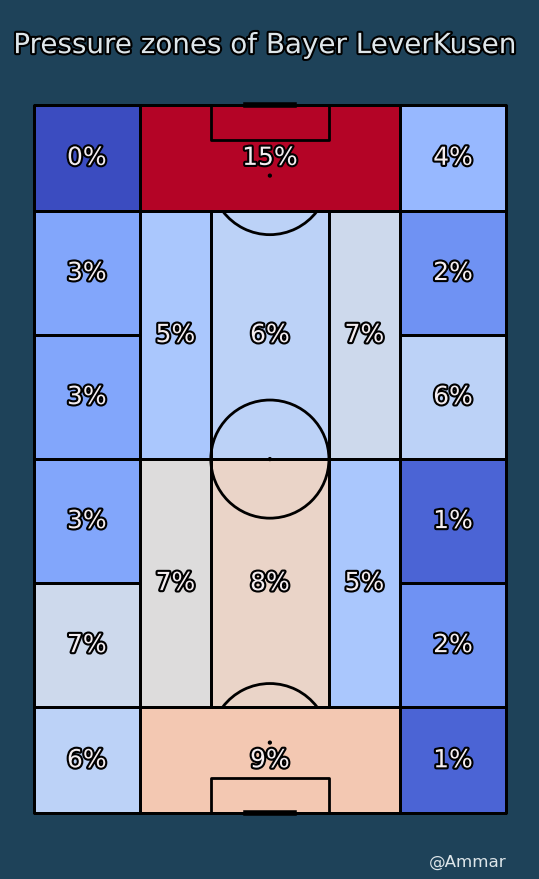

In [28]:
#Heatmap for the Pressure zones as per Juego de Posicion
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259', line_color='black')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                    title_height=0.08, title_space=0,
                    axis=False, grid_height=0.84)

fig.set_facecolor("#1e4259")

bin_statistic = pitch.bin_statistic_positional(events_df.x, events_df.y, statistic='count', positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'], edgecolors='black', cmap='coolwarm')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)


axs['endnote'].text(1,0.1, '@Ammar', va='center', ha='right', fontsize=12, color='#dee6ea')
axs['title'].text(0.5, 0.5, "Pressure zones of Bayer LeverKusen ", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff, fontsize=20);